In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sphinxext.plot_directive import plot_context
%matplotlib inline

In [101]:
np.random.seed(0)
X = np.linspace(1, 10, 70).reshape(-1, 1)  # Niveau d'expérience de 1 à 10
y = 500 + 100 * X + 50 * X**2 + np.random.randn(70, 1) * 300  # Salaire avec une relation quadratique + bruit

df = pd.DataFrame({
    "Experience": X.flatten(),
    "Salaire": y.flatten()
})

df.head()


,Experience,Salaire
0,1.000000,1179.215704
1,1.130435,796.984781
2,1.260870,999.197955
3,1.391304,1408.184784
4,1.521739,1328.225809


Text(0, 0.5, 'Salaire')

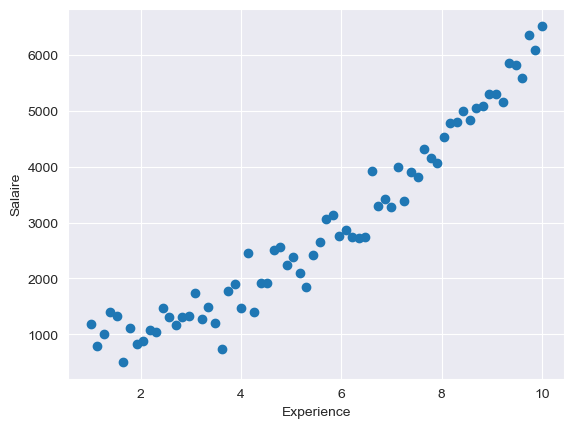

In [102]:
plt.scatter(X, y)
plt.xlabel('Experience')
plt.ylabel('Salaire')


In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [126]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_poly

array([[ 1.        ,  5.30434783, 28.13610586],
       [ 1.        ,  8.17391304, 66.81285444],
       [ 1.        ,  9.86956522, 97.40831758],
       [ 1.        ,  9.08695652, 82.57277883],
       [ 1.        ,  6.60869565, 43.67485822],
       [ 1.        ,  1.52173913,  2.31568998],
       [ 1.        ,  9.47826087, 89.83742911],
       [ 1.        ,  7.52173913, 56.57655955],
       [ 1.        ,  1.26086957,  1.58979206],
       [ 1.        ,  6.2173913 , 38.65595463],
       [ 1.        ,  2.43478261,  5.92816635],
       [ 1.        ,  1.39130435,  1.93572779],
       [ 1.        ,  8.04347826, 64.69754253],
       [ 1.        ,  6.86956522, 47.19092628],
       [ 1.        ,  2.30434783,  5.3100189 ],
       [ 1.        ,  6.34782609, 40.29489603],
       [ 1.        ,  7.39130435, 54.63137996],
       [ 1.        ,  7.91304348, 62.61625709],
       [ 1.        ,  8.43478261, 71.14555766],
       [ 1.        ,  5.17391304, 26.76937618],
       [ 1.        ,  2.82608696,  7.986

In [127]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [128]:
y_test_pred = model.predict(X_test_poly)

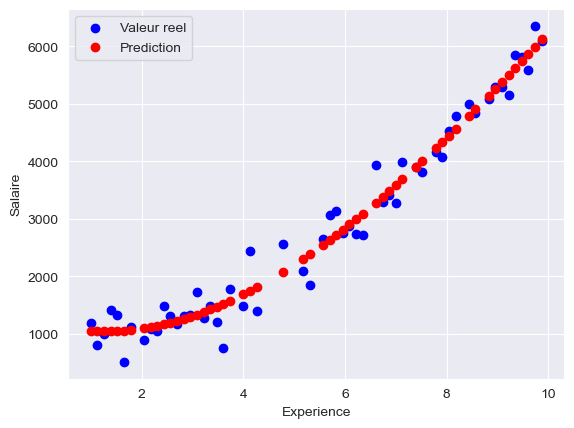

In [140]:
plt.scatter(X_train, y_train, color='blue', label="Valeur reel")
plt.scatter(X_train, model.predict(X_train_poly), color='red', label="Prediction", )
plt.xlabel('Experience')
plt.ylabel('Salaire')
plt.legend()


In [132]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_test_pred)
score

0.9752078833762536

In [133]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model.fit(X_train_poly, y_train)
y_test_pred = model.predict(X_test_poly)


In [134]:
score = r2_score(y_test, y_test_pred)
score

0.9706099908729892

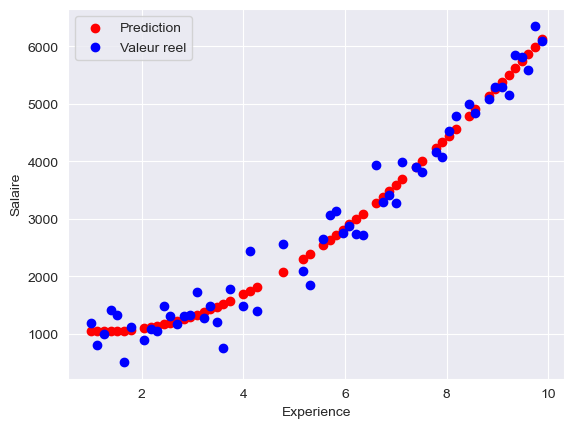

In [147]:
y_train_pred = model.predict(X_train_poly)
plt.scatter(X_train, y_train_pred, color='red', label="Prediction")
plt.scatter(X_train, y_train, color='blue', label="Valeur reel")
plt.xlabel('Experience')
plt.ylabel('Salaire')
plt.legend()


In [144]:
new_x = np.linspace(1, 10, 30).reshape(-1, 1)
new_x_poly = poly.fit_transform(new_x)
prediction = model.predict(new_x_poly)


In [145]:
new_x_poly

array([[   1.        ,    1.        ,    1.        ,    1.        ],
       [   1.        ,    1.31034483,    1.71700357,    2.24986674],
       [   1.        ,    1.62068966,    2.62663496,    4.2569601 ],
       [   1.        ,    1.93103448,    3.72889417,    7.20062323],
       [   1.        ,    2.24137931,    5.02378121,   11.26019927],
       [   1.        ,    2.55172414,    6.51129608,   16.61503137],
       [   1.        ,    2.86206897,    8.19143876,   23.44446267],
       [   1.        ,    3.17241379,   10.06420927,   31.92783632],
       [   1.        ,    3.48275862,   12.12960761,   42.24449547],
       [   1.        ,    3.79310345,   14.38763377,   54.57378326],
       [   1.        ,    4.10344828,   16.83828775,   69.09504285],
       [   1.        ,    4.4137931 ,   19.48156956,   85.98761737],
       [   1.        ,    4.72413793,   22.31747919,  105.43084997],
       [   1.        ,    5.03448276,   25.34601665,  127.60408381],
       [   1.        ,    5.344827

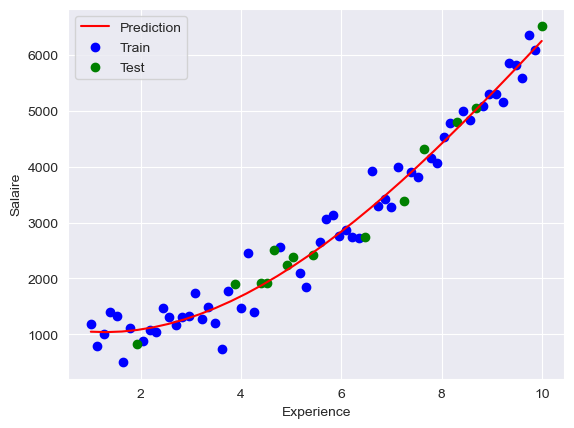

In [146]:
plt.plot(new_x, prediction, color='red', label="Prediction")
plt.scatter(X_train, y_train, color='blue', label="Train")
plt.scatter(X_test, y_test, color='green', label="Test")
plt.xlabel('Experience')
plt.ylabel('Salaire')
plt.legend()

In [24]:
# Pipeline in polynomial regression
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def pipeline(degree):
    x_p = np.random.rand(100, 1) * 10
    y_p = 3*x_p**2 + 2*x_p + 5 + np.random.randn(100, 1) * 10
    x_p_train, x_p_test, y_p_train, y_p_test = train_test_split(x_p, y_p, test_size=0.2, random_state=42)
    poly_regression = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('model', LinearRegression())
    ])

    poly_regression.fit(x_p_train, y_p_train)

    new_x_p = np.linspace(0, 10, 100).reshape(-1, 1)
    prediction_p = poly_regression.predict(new_x_p)

    plt.scatter(x_p_test, y_p_test, color='red', label='Données réelles')
    plt.plot(new_x_p, prediction_p, color='blue', label='Prédiction')
    plt.scatter(x_p_train, y_p_train, color='green', label="Entrainement")
    plt.legend()
    plt.xlabel('Experience')
    plt.ylabel('Salaire')





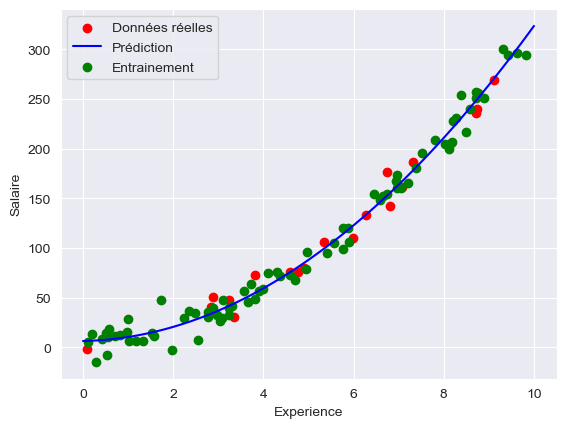

In [25]:
pipeline(2)